# [Unsupervised ML] Cryptocurrency Price Prediction Analysis
---
## Step #0 - Import & Setup Dependencies
---

In [1]:
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Step #1 - Load CSV Data into Pandas DataFrame (`raw_crypto_df`)
---

In [2]:
# Using Pandas, store the Crypto Market Dataset into a new DataFrame with 'coin_id' as the index
raw_crypto_df = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col = "coin_id")

# Display first 15 datapoints
raw_crypto_df.head(15)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


## Step #2 - Generate Summary Statistics
---

In [3]:
raw_crypto_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


## Step #3 - Visualise the Raw Crypto Data (Prior to Modification)
---

In [4]:
raw_crypto_df.hvplot.line(
    width = 800,
    height = 400,
    rot = 0
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

## Step #4 - Prepare the Crypto Data (Normalisation)
---

In [5]:
# From scikit-learn, utilise the StandardScaler() module to transform the CSV dataset to a standardised normal distribution
scaled_crypto_market_data = StandardScaler().fit_transform(raw_crypto_df)

In [6]:
# Store the standardised data into a new DataFrame, and label the columns the same as from the raw CSV dataset
scaled_crypto_df = pd.DataFrame(scaled_crypto_market_data, columns = raw_crypto_df.columns)

# Copy the cryptocurrency names (indexes) from the raw CSV dataset
scaled_crypto_df["coin_id"] = raw_crypto_df.index

# Set 'coin_id' as the index for the scaled DataFrame
scaled_crypto_df = scaled_crypto_df.set_index("coin_id")

# Preview the DataFrame w/ the Scaled Crypto Market Dataset
scaled_crypto_df.head(15)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


## Step #5 - Find the Best `k` Value Using the Scaled Data (`scaled_crypto_df`)
---
### Create a Range of Values for `k`

In [7]:
k_range = range(1, 12)

print(k_range)

range(1, 12)


### K-Means Algorithm - Calculate the Inertia for each `k` Value 

In [8]:
# Create an empty list to store the inertia value for each possible k value
# Inertia (Sum of Squares) = Measure of how far the points within a cluster are from the centroid
# Will assist with evaluating the performance of the k-means models
inertia_values = []

# For every k value in the range of k values...
for k_value in k_range:
    k_model = KMeans(n_clusters = k_value, random_state = 42)      # Create a k-Means model using the current k value
    k_model.fit(scaled_crypto_df)                                  # Fit the current k-Means model to my scaled DataFrame
    inertia_values.append(k_model.inertia_)                        # Append the inertia of the fitted model to the list

C:\ProgramData\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

In [9]:
k_inertia = {"k": k_range, "inertia": inertia_values}

elbow_df = pd.DataFrame(k_inertia)

elbow_df

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379
5,6,54.739922
6,7,43.481606
7,8,37.517032
8,9,32.591891
9,10,28.222899


### Plot Line Chart of All Inertia Values Against each `k` Value

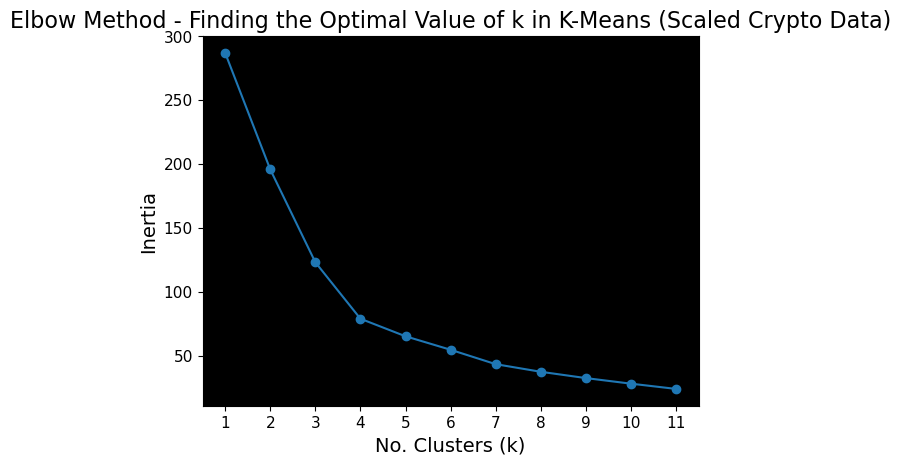

In [10]:
# Create the Line Plot using Matplotlib (plt) where...
# 'x' axis is the k-value; 'y' axis is the Inertia value
# The dotted points in the plot are circle-styled
plt_lineplot = plt.plot(elbow_df["k"],
                        elbow_df["inertia"],
                        marker = 'o')


# In the Line plot, set a new label for the 'x' axis where Font Size is 14
plt.xlabel("No. Clusters (k)", fontsize = 14)

# In the Line plot, set a new label for the 'y' axis where Font Size is 14
plt.ylabel("Inertia", fontsize = 14)

# In the Line plot, adjust 'x' tick Font size to 11
plt.xticks(k_range, fontsize = 11)

# In the Line plot, adjust 'y' tick Font size to 11
plt.yticks(fontsize = 11)

# In the Line plot, set a new title where Font Size is 16
plt.title(f"Elbow Method - Finding the Optimal Value of k in K-Means (Scaled Crypto Data)", fontsize  = 16)

# Set the background color of the Scatter plot (within the axes) to Black
plt.gca().set_facecolor("black")


# Display the Line Plot (Using Matplotlib)
plt.show()

### [hvPlot] Plot Line Chart of All Inertia Values Against each `k` Value

In [11]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_scaled_plot = elbow_df.hvplot.line(
    x="k", 
    y="inertia", 
    title ="Elbow Method - Finding the Optimal Value of k in K-Means (Scaled Crypto Data)", 
    xticks = k_range
)

elbow_scaled_plot

:Curve   [k]   (inertia)

### [Question] What is the Best Value for `k`?

**Answer:** 4

**Reason:** The optimal number of clusters is the point where the inertia (sum of squared) value begins to decrease in a linear fashion. Typically, the inertia decreases as the number of clusters increases but too many can lead to overfitting.

From the line plot, we can see the 'elbow point' is 4 i.e. best `k` value = 4

## Step #6 - Cluster Cryptocurrencies w/ K-Means Using the Scaled Data (`scaled_crypto_df`)
---
### Initialise & Fit K-Means Model (`k` = 4)

In [12]:
# Assign a variable with the best k value
best_k = 4

# Create a k-Means model using the best k value
best_kmeans_model = KMeans(n_clusters = best_k, random_state = 42)   

# Fit the K-Means Model using the Scaled Crypto Data
best_kmeans_model.fit(scaled_crypto_df)

C:\ProgramData\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

### Predict the Clusters to Group the Cryptocurrencies Using the Scaled Data (`scaled_crypto_df`)

In [13]:
kmeans_prediction = best_kmeans_model.predict(scaled_crypto_df)

kmeans_prediction

array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 2])

### Create a Copy of the Scaled DataFrames w/ New Column for the Predicted Clusters (`kmeans_crypto_df`)

In [14]:
kmeans_crypto_df = scaled_crypto_df.copy()

kmeans_crypto_df["cluster_prediction"] = kmeans_prediction

kmeans_crypto_df.head(15)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster_prediction
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,0
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,0
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,0
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,0


### [hvPlot] Visualise the Scaled Crypto Data w/ Cluster Predictions (`kmeans_crypto_df`)

In [15]:
scatter_scaled_crypto = kmeans_crypto_df.hvplot.scatter(
    x ="price_change_percentage_24h",
    y ="price_change_percentage_7d",
    by = "cluster_prediction",
    hover_cols = ["coin_id"],
    title = 'Scatter Plot - Normalised Crypto Data'
)

scatter_scaled_crypto

:NdOverlay   [cluster_prediction]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

## Step #7 - Optimise the Clusters with Principal Component Analysis
---
### Create the PCA Model (`pca_model`)

In [16]:
pca_model = PCA(n_components = 3)

### Use the PCA Model to Reduce to Three Feature Components (`crypto_pca`)

In [17]:
crypto_pca = pca_model.fit_transform(scaled_crypto_df)

crypto_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

### PCA Model - Explained Variance for the Three Variances (`pca_model`)

In [18]:
variance_pca = pca_model.explained_variance_ratio_

print(variance_pca)
print()
print(f"Total Explained Variance: {sum(variance_pca)}")

[0.3719856  0.34700813 0.17603793]

Total Explained Variance: 0.8950316570309841


### [Question] What is the Total Explained Variance of the Three Principal Components?

**Answer:** 89.5%

### Store the PCA Data in a new DataFrame (`pca_crypto_df`)

In [19]:
pca_crypto_df = pd.DataFrame(crypto_pca, columns = ["PCA1", "PCA2", "PCA3"])

# Copy the cryptocurrency names (indexes) from the raw CSV dataset
pca_crypto_df["coin_id"] = raw_crypto_df.index

# Set 'coin_id' as the index for the PCA DataFrame
pca_crypto_df = pca_crypto_df.set_index("coin_id")

# Preview the DataFrame w/ the Scaled Crypto Market Dataset
pca_crypto_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


## Step #8 - Find the Best `k` Value Using the PCA Data (`pca_crypto_df`)
---
### Create a Range of Values for `k`

In [20]:
pca_k_range = range(1, 12)

print(pca_k_range)

range(1, 12)


### K-Means Algorithm - Calculate the Inertia for each `k` Value 

In [21]:
# Create an empty list to store the inertia value for each possible k value
pca_inertia_values = []

# For every k value in the range of k values...
for k_value in pca_k_range:
    k_model = KMeans(n_clusters = k_value, random_state = 42)      # Create a k-Means model using the current k value
    k_model.fit(pca_crypto_df)                                     # Fit the current k-Means model to my PCA DataFrame
    pca_inertia_values.append(k_model.inertia_)                    # Append the inertia of the fitted model to the list

C:\ProgramData\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

In [22]:
pca_k_inertia = {"k": pca_k_range, "inertia": pca_inertia_values}

pca_elbow_df = pd.DataFrame(pca_k_inertia)

pca_elbow_df

,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,37.839466
5,6,30.777746
6,7,21.134056
7,8,17.091637
8,9,13.681140
9,10,10.630648


### [Matplotlib] Plot Line Chart of All Inertia Values Against each `k` Value

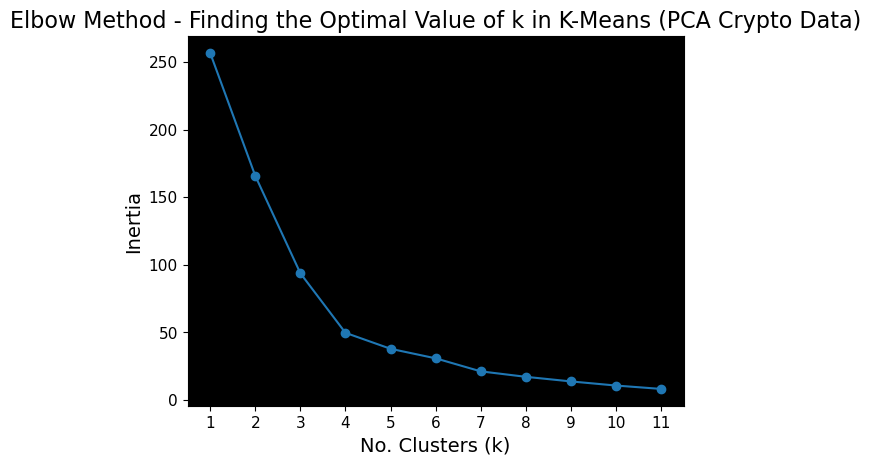

In [23]:
# Create the Line Plot using Matplotlib (plt) where...
# 'x' axis is the k-value; 'y' axis is the Inertia value
# The dotted points in the plot are circle-styled
plt_pca_lineplot = plt.plot(pca_elbow_df["k"],
                            pca_elbow_df["inertia"],
                            marker = 'o')


# In the Line plot, set a new label for the 'x' axis where Font Size is 14
plt.xlabel("No. Clusters (k)", fontsize = 14)

# In the Line plot, set a new label for the 'y' axis where Font Size is 14
plt.ylabel("Inertia", fontsize = 14)

# In the Line plot, adjust 'x' tick Font size to 11
plt.xticks(k_range, fontsize = 11)

# In the Line plot, adjust 'y' tick Font size to 11
plt.yticks(fontsize = 11)

# In the Line plot, set a new title where Font Size is 16
plt.title(f"Elbow Method - Finding the Optimal Value of k in K-Means (PCA Crypto Data)", fontsize  = 16)

# Set the background color of the Scatter plot (within the axes) to Black
plt.gca().set_facecolor("black")


# Display the Line Plot (Using Matplotlib)
plt.show()

### [hvPlot] Plot Line Chart of All Inertia Values Against each `k` Value

In [24]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_pca_plot = pca_elbow_df.hvplot.line(
    x="k", 
    y="inertia", 
    title ="Elbow Method - Finding the Optimal Value of k in K-Means (PCA Crypto Data)", 
    xticks = k_range
)

elbow_pca_plot

:Curve   [k]   (inertia)

### [Question #1] What is the Best Value for `k`?

**Answer:** `k` = 4

### [Question #2] Does it Differ from the Best `k` Value Found Using the Original Data?

**Answer:** No, but the inertia value (when `k` = 4) from the original data (79.022435) is larger. In other words, the distance measure between the points within a cluster and the centroid using the PCA Crypto Data is smaller than the distance measure when using the Scaled Crypto Data.

## Step #9 - Cluster Cryptocurrencies w/ K-Means Using the PCA Data (`pca_crypto_df`)
---
### Initialise & Fit K-Means Model (`k` = 4)

In [25]:
# Assign a variable with the best k value
pca_best_k = 4

# Create a k-Means model using the best k value
pca_best_kmeans_model = KMeans(n_clusters = pca_best_k, random_state = 42)   

# Fit the K-Means Model using the PCA Crypto Data
pca_best_kmeans_model.fit(pca_crypto_df)

C:\ProgramData\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

### Predict the Clusters to Group the Cryptocurrencies Using the PCA Data (`pca_crypto_df`)

In [26]:
pca_kmeans_prediction = pca_best_kmeans_model.predict(pca_crypto_df)

pca_kmeans_prediction

array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 2])

### Create a Copy of the Scaled DataFrames w/ New Column for the Predicted Clusters (`kmeans_crypto_df`)

In [27]:
pca_kmeans_crypto_df = pca_crypto_df.copy()

pca_kmeans_crypto_df["cluster_prediction"] = pca_kmeans_prediction

pca_kmeans_crypto_df.head(15)

,PCA1,PCA2,PCA3,cluster_prediction
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0
binancecoin,-0.516534,1.388377,0.804071,0
chainlink,-0.450711,0.517699,2.846143,0
cardano,-0.345600,0.729439,1.478013,0
litecoin,-0.649468,0.432165,0.600303,0


### [hvPlot] Visualise the PCA Crypto Data w/ Cluster Predictions (`pca_kmeans_crypto_df`)

In [28]:
scatter_pca_crypto = pca_kmeans_crypto_df.hvplot.scatter(
    x ="PCA1",
    y ="PCA2",
    by = "cluster_prediction",
    hover_cols = ["coin_id"],
    title = 'Scatter Plot - PCA Crypto Data'
)

scatter_pca_crypto

:NdOverlay   [cluster_prediction]
   :Scatter   [PCA1]   (PCA2,coin_id)

## Step #10 - Visualise and Compare the Results
---
### Elbow Curves - Composite Plot for Contrast

In [29]:
comp_elbow = elbow_scaled_plot + elbow_pca_plot

comp_elbow

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

### Clusters - Composite Plot for Contrast

In [30]:
comp_cluster = scatter_scaled_crypto + scatter_pca_crypto

comp_cluster

:Layout
   .NdOverlay.I  :NdOverlay   [cluster_prediction]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [cluster_prediction]
      :Scatter   [PCA1]   (PCA2,coin_id)

### [Question] After visually analysing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

**Answer:** Tighter clusters are formed using the PCA data, whereas utilising the original scaled data develops clusters that are more dispersed in contrast. This is likely due to the PCA model having reduced dimensionality and therefore allowing it to focus on the most significant variations.